# Clasificar el cancer de cervix

Las redes neuronales artificiales (también conocidas como sistemas conexionistas) son un modelo computacional vagamente inspirado en el comportamiento observado en su homólogo biológico1.
Consiste en un conjunto de unidades, llamadas neuronas artificiales, conectadas entre sí para transmitirse señales. La información de entrada atraviesa la red neuronal (donde se somete a diversas operaciones) produciendo unos valores de salida.

- Red Neuronal

### Autores
   * Efrén Jiménez

## Análisis del Problema

Cada año se diagnostican alrededor de 11,000 nuevos casos de cáncer de cuello uterino invasivo en los EE. UU. Sin embargo, la cantidad de nuevos casos de cáncer de cuello uterino ha disminuido de manera constante durante las últimas décadas. Aunque es el tipo de cáncer más prevenible, cada año el cáncer de cuello uterino mata a unas 4.000 mujeres en los EE. UU. Y a unas 300.000 en todo el mundo. En los Estados Unidos, las tasas de mortalidad por cáncer de cuello uterino se redujeron en un 74% entre 1955 y 1992 gracias al aumento de las pruebas de detección y la detección temprana con la prueba de Papanicolaou. EDAD El cincuenta por ciento de los diagnósticos de cáncer de cuello uterino ocurren en mujeres de 35 a 54 años, y aproximadamente el 20% ocurre en mujeres mayores de 65 años. La edad media de diagnóstico es de 48 años. Aproximadamente el 15% de las mujeres desarrollan cáncer de cuello uterino entre los 20 y los 30 años. El cáncer de cuello uterino es extremadamente raro en mujeres menores de 20 años. Sin embargo, muchas mujeres jóvenes se infectan con múltiples tipos de virus del papiloma humano, que luego pueden aumentar su riesgo de contraer cáncer de cuello uterino en el futuro.

![blackbell](https://storage.googleapis.com/kaggle-datasets-images/new-version-temp-images/default-backgrounds-86.png-3984338/dataset-cover.png)

### Librerías

In [189]:
!pip install numpy
!pip install pandas

In [4]:
import warnings
warnings.filterwarnings('ignore')
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

## Entendimiento de los Datos

El total es de 858 registro con 36 columnas dentro del set de datos de entrenamiento

'Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'

In [2]:
#Cargar los datos
kag_risk_factors_cervical_cancer = pd.read_csv(r"data/kag_risk_factors_cervical_cancer.csv",na_values='?')

In [3]:
kag_risk_factors_cervical_cancer.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [34]:
kag_risk_factors_cervical_cancer=kag_risk_factors_cervical_cancer.drop(
    columns=["Number of sexual partners",
             "STDs: Time since first diagnosis",
             "STDs: Number of diagnosis",
             "STDs: Time since last diagnosis",
             "First sexual intercourse",
             "Num of pregnancies",
             "Smokes",
             "Smokes (years)",
             "Smokes (packs/year)",
             "Hormonal Contraceptives",
             "Hormonal Contraceptives (years)",
             "IUD",
             "IUD (years)",
             "STDs",             
             "STDs (number)",
             "STDs:condylomatosis",
             "STDs:cervical condylomatosis",
             "STDs:vaginal condylomatosis",
             "STDs:vulvo-perineal condylomatosis",
             "STDs:syphilis",
             "STDs:pelvic inflammatory disease",
             "STDs:genital herpes",
             "STDs:molluscum contagiosum",
             "STDs:AIDS",
             "STDs:HIV",
             "STDs:Hepatitis B",
             "STDs:HPV"
            ]) 

In [35]:
#Primeros registros
kag_risk_factors_cervical_cancer.head()

,Age,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,0,0,0,0,0,0,0,0
1,15,0,0,0,0,0,0,0,0
2,34,0,0,0,0,0,0,0,0
3,52,1,0,1,0,0,0,0,0
4,46,0,0,0,0,0,0,0,0


In [36]:
#Describir dataset
kag_risk_factors_cervical_cancer.describe()

,Age,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
#Información del dataset
kag_risk_factors_cervical_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Age         858 non-null    int64
 1   Dx:Cancer   858 non-null    int64
 2   Dx:CIN      858 non-null    int64
 3   Dx:HPV      858 non-null    int64
 4   Dx          858 non-null    int64
 5   Hinselmann  858 non-null    int64
 6   Schiller    858 non-null    int64
 7   Citology    858 non-null    int64
 8   Biopsy      858 non-null    int64
dtypes: int64(9)
memory usage: 60.5 KB


In [38]:
# Numero de registros del dataset
print("Cantidad de registros:",len(kag_risk_factors_cervical_cancer))
# Cantidad de columnas del dataset
print("Cantidad de columnas:",len(kag_risk_factors_cervical_cancer.columns))
# Tipos de datos del dataset
print("Tipo de datos:",kag_risk_factors_cervical_cancer.dtypes.unique())
# Tamaño del daset
print("Filas y columnas:",kag_risk_factors_cervical_cancer.shape)

Cantidad de registros: 858
Cantidad de columnas: 9
Tipo de datos: [dtype('int64')]
Filas y columnas: (858, 9)


In [39]:
# Chekear valores nulos
print(kag_risk_factors_cervical_cancer.isnull().any().sum(), ' / ', len(kag_risk_factors_cervical_cancer.columns))

0  /  9


In [43]:
#Cuales columnnas estas con valores nulos
kag_risk_factors_cervical_cancer.isnull().sum()[kag_risk_factors_cervical_cancer.isnull().sum() > 0]

Series([], dtype: int64)

In [44]:
# N/A= Valores vacios 
#Usar solo si se quiere eliminar los registros que contienen columnas vacías
kag_risk_factors_cervical_cancer=kag_risk_factors_cervical_cancer.dropna() 

In [45]:
kag_risk_factors_cervical_cancer

,Age,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,0,0,0,0,0,0,0,0
1,15,0,0,0,0,0,0,0,0
2,34,0,0,0,0,0,0,0,0
3,52,1,0,1,0,0,0,0,0
4,46,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
853,34,0,0,0,0,0,0,0,0
854,32,0,0,0,0,0,0,0,0
855,25,0,0,0,0,0,0,1,0
856,33,0,0,0,0,0,0,0,0


In [46]:
kag_risk_factors_cervical_cancer["Dx:Cancer"].unique()

array([0, 1], dtype=int64)

In [47]:
kag_risk_factors_cervical_cancer['Dx:Cancer'].value_counts(normalize=True)

0    0.979021
1    0.020979
Name: Dx:Cancer, dtype: float64

<AxesSubplot:xlabel='Dx:Cancer', ylabel='count'>

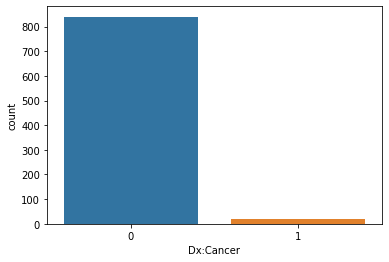

In [48]:
sns.countplot(kag_risk_factors_cervical_cancer['Dx:Cancer'])

## Exploración de los Datos

#### Gráficos exploratorios

In [79]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(kag_risk_factors_cervical_cancer[["Age","Dx:CIN","Dx:HPV","Dx","Hinselmann","Schiller",
                                                                       "Citology","Biopsy"]],kag_risk_factors_cervical_cancer[["Dx:Cancer"]], test_size=0.3, random_state=1234)

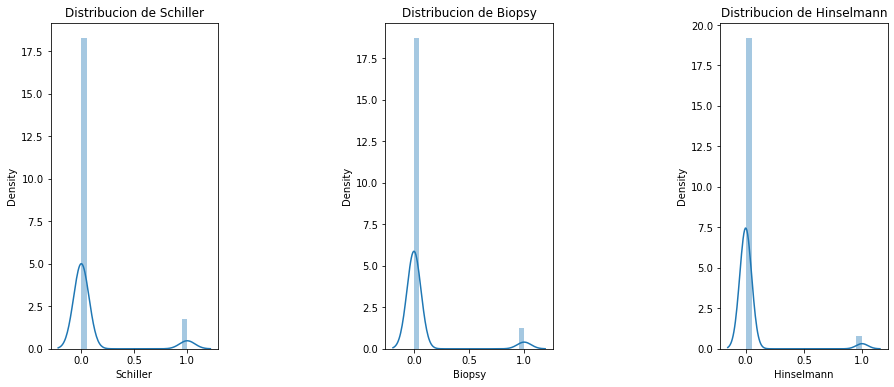

In [109]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Schiller' , 'Biopsy' , 'Hinselmann']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =1 , wspace = 1)
    sns.distplot(kag_risk_factors_cervical_cancer[x] , bins = 20)
    plt.title('Distribucion de {}'.format(x))
plt.show()

In [110]:
kag_risk_factors_cervical_cancer.sort_values(by=['Age'])["Age"].value_counts().index

Int64Index([23, 18, 21, 20, 19, 24, 25, 26, 28, 30, 17, 29, 27, 22, 35, 33, 31,
            36, 34, 16, 15, 32, 37, 41, 40, 39, 38, 45, 44, 42, 43, 14, 46, 48,
            49, 52, 70, 84, 79, 47, 50, 51, 59, 13],
           dtype='int64')

In [111]:
df = kag_risk_factors_cervical_cancer.groupby(by=["Age"])['Age'].size().nlargest(8).reset_index(name='top8')

Text(0.5, 1.0, 'Distribucion de la edad de las mujeres')

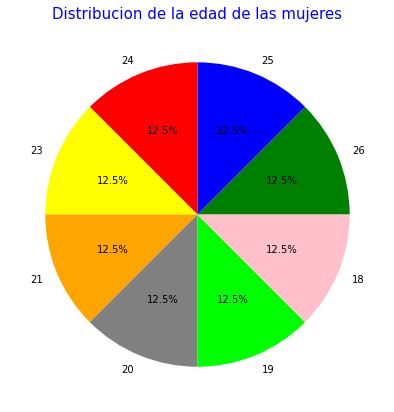

In [113]:
labels = df.Age.value_counts().index
colors = ['green','blue','red','yellow','orange','gray','lime','pink']
explode = [0,0,0,0,0,0,0,0,]
sizes = df.Age.value_counts().values

# visual
plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Distribucion de la edad de las mujeres',color = 'blue',fontsize = 15)

In [114]:
kag_risk_factors_cervical_cancer

,Age,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,0,0,0,0,0,0,0,0
1,15,0,0,0,0,0,0,0,0
2,34,0,0,0,0,0,0,0,0
3,52,1,0,1,0,0,0,0,0
4,46,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
853,34,0,0,0,0,0,0,0,0
854,32,0,0,0,0,0,0,0,0
855,25,0,0,0,0,0,0,1,0
856,33,0,0,0,0,0,0,0,0


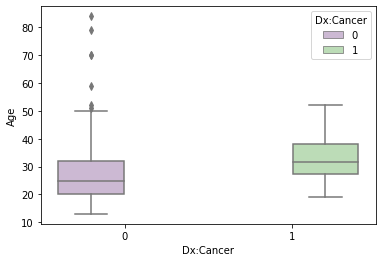

In [115]:
sns.boxplot(x="Dx:Cancer", y="Age", hue="Dx:Cancer", data=kag_risk_factors_cervical_cancer, palette="PRGn")
plt.show()

>Es importante siempre validar los rangos de los conjuntos de datos creados, para evitar caer en extrapolación:

In [52]:
print("Entrenamiento dimensiones",X_train.shape)
print("Descripción")
X_train.describe

Entrenamiento dimensiones (600, 8)
Descripción


<bound method NDFrame.describe of      Age  Dx:CIN  Dx:HPV  Dx  Hinselmann  Schiller  Citology  Biopsy
650   26       0       0   0           0         0         0       0
751   41       0       0   0           0         0         0       0
167   27       0       0   0           0         0         0       0
451   16       0       0   0           0         0         0       0
406   17       0       0   0           0         0         0       0
..   ...     ...     ...  ..         ...       ...       ...     ...
204   21       0       0   0           0         0         0       0
53    35       0       0   0           0         0         0       0
294   23       0       0   0           0         0         0       0
723   19       0       0   0           0         0         0       0
815   30       0       0   0           0         0         0       0

[600 rows x 8 columns]>

In [53]:
print("Pruebas dimensiones",X_test.shape)
print("Descripción")
X_test.describe

Pruebas dimensiones (258, 8)
Descripción


<bound method NDFrame.describe of      Age  Dx:CIN  Dx:HPV  Dx  Hinselmann  Schiller  Citology  Biopsy
443   15       0       0   0           0         0         0       0
146   30       0       0   0           0         0         0       0
122   31       0       0   0           0         0         0       0
226   26       0       0   0           0         0         0       0
322   20       0       0   0           0         0         0       0
..   ...     ...     ...  ..         ...       ...       ...     ...
305   20       0       0   0           0         0         0       0
153   26       0       0   0           0         0         0       0
826   33       0       0   0           0         0         0       0
411   17       0       0   0           1         1         1       0
221   25       0       0   0           0         0         0       0

[258 rows x 8 columns]>

## Modelo de Machine Learning

Una vez seleccionadas las variables para incluir en el modelo de regresión, se procede a crearlo:

In [57]:
#-------------- 
# ANN 
#--------------
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(activation='tanh', max_iter=10000, hidden_layer_sizes=(18,9,4,3))

In [58]:
# Entrenamos nuestro modelo
model.fit(X_train, y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(18, 9, 4, 3),
              max_iter=10000)

In [60]:
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred1 = model.predict( X_test )

In [61]:
y_pred1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [63]:
predict_values=model.predict_proba(X_test)
predict_values[:, 1]

array([0.01636223, 0.01640109, 0.01640821, 0.01637831, 0.01636077,
       0.01656174, 0.01638857, 0.01637401, 0.01636441, 0.01640109,
       0.01635944, 0.01639454, 0.01651495, 0.01755125, 0.01638317,
       0.01637831, 0.01637026, 0.01637831, 0.01638857, 0.01636231,
       0.01642424, 0.01637296, 0.01657967, 0.01637831, 0.01640821,
       0.0164639 , 0.01640821, 0.01636231, 0.01637401, 0.01641592,
       0.01636061, 0.01651495, 0.01640109, 0.01636231, 0.01645299,
       0.01636706, 0.01644275, 0.01636231, 0.01636223, 0.01638653,
       0.01645299, 0.01636077, 0.01636231, 0.01644275, 0.87480369,
       0.01643318, 0.01635981, 0.01635981, 0.01636077, 0.01635944,
       0.01643318, 0.0164639 , 0.01659837, 0.0163597 , 0.01635944,
       0.01644275, 0.01643248, 0.01636077, 0.01636061, 0.0163597 ,
       0.01634355, 0.01637831, 0.01635981, 0.01704577, 0.01638317,
       0.01656204, 0.01636796, 0.0163857 , 0.01638317, 0.01635981,
       0.0163597 , 0.01634355, 0.01636231, 0.01643318, 0.01637

## Evaluación

In [65]:
np.array(y_pred1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [66]:
matrix=confusion_matrix(np.array(y_test), np.array(y_pred1))
matrix

array([[251,   0],
       [  0,   7]], dtype=int64)

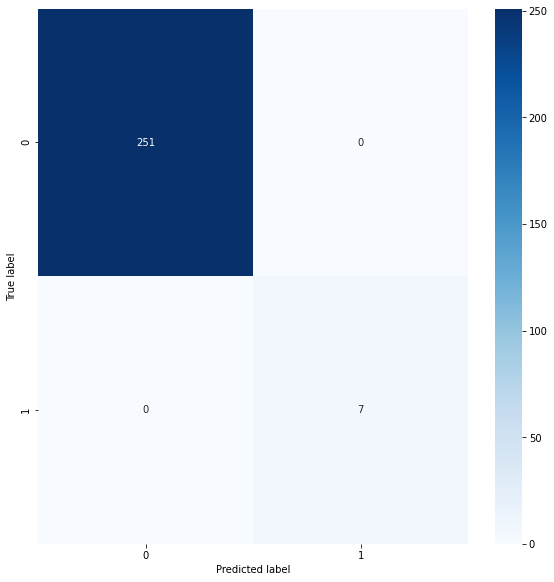

In [67]:
figure = plt.figure(figsize=(8, 8))
sns.heatmap(matrix, annot=True,fmt='g', cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [117]:
scoresSVC = cross_val_score( model, X_test, y_test, cv=10)
print("Mean kernel-SVM CrossVal Accuracy on model Set %.2f, with std=%.2f" % (scoresSVC.mean(), scoresSVC.std() ))

scoresSVC = cross_val_score( model, X_train, y_train, cv=10)
print("Mean kernel-SVM CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresSVC.mean(), scoresSVC.std() ))
model.score(X_train, y_train)

Mean kernel-SVM CrossVal Accuracy on model Set 0.99, with std=0.02
Mean kernel-SVM CrossVal Accuracy on Train Set 0.99, with std=0.01


0.9983333333333333

In [118]:
auc = roc_auc_score(y_test, predict_values[:, 1])
print('AUC: %.2f' % auc)

AUC: 1.00


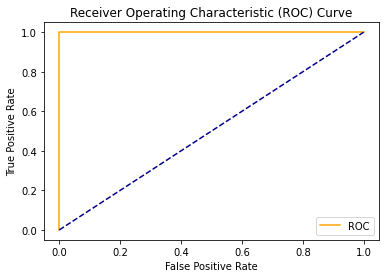

In [119]:
fpr, tpr, thresholds = roc_curve(y_test, predict_values[:, 1])
plt.plot(fpr, tpr, color='orange', label='ROC')

plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [73]:
(matrix[[0]][0][0] + matrix[[1]][0][1])/X_test.shape[0]

1.0

\begin{equation}Exactitud=\frac{VP+VN}{Total}\end{equation}

In [74]:
(matrix[[0]][0][0])/X_test.shape[0]

0.9728682170542635

\begin{equation}\text{Sensibilidad}=\frac{VP}{\text{Total Positivos}}\end{equation}

In [75]:
(matrix[[0]][0][0])/(matrix[[0]][0][0] + matrix[[1]][0][0])

1.0

\begin{equation}\text{Precisión}=\frac{VP}{\text{Total clasificados positivos}}\end{equation}

In [76]:
(matrix[[1]][0][1])/(matrix[[0]][0][1] + matrix[[1]][0][1])

1.0

\begin{equation}\text{Especificidad}=\frac{VN}{\text{Total Negativos}}\end{equation}

## Resultados
En conclusión, los valores obtenidos por la clasifición verdaderos positivos estan muy agustados. Por lo cual no se recomienda utilizar este modelo de machine learning.